# Advanced topics in User Interfaces

## 🧐 **Learning goals** 
The tutorial covers the topics explained during the lecture in the following parts:

1.   to get introduced with a simple autoencoder based on a fully-connected neural layer
2.   to train and test models on the Fashion-MNIST dataset
3.   to work with different parameters of the model
4.   to visualize latent spaces


## 🔑1. Introduction

### What are autoencoders?🤔

"Autoencoding" is a kind of data reconstruction algorithm based on compression and decompression functions, where those functions are:
* <font color=lightgreen>Data-specific</font>

Autoencoders will only be able to reconstruct data similar to what they have been trained on. For instance, an autoencoder trained on pictures of faces would do a rather poor job of reconstructing pictures of trees, because the features it would learn would be face-specific.
* <font color=lightblue>Lossy</font>

The reconstructions will be degraded compared to the original inputs, similar to MP3 or JPEG compression.

* <font color=lightpink>Learned automatically from examples rather than engineered by a human</font>

It is easy to train specialized instances of the autoencoder model that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

In [17]:
from IPython.display import Image
Image(url='https://blog.keras.io/img/ae/autoencoder_schema.jpg')

### 🔨 How to build autoencoders?
To build an autoencoder, you need three things:

1) <font color=gold>encoding function</font>

2) <font color=pink>decoding function</font> 

3) <font color=lightblue>loss function</font>

In this exercise, the encoding and decoding functions are neural networks. Nevertheless, they can be any parametric function that can be differentiable with respect to a loss function, so the parameters of the encoding/decoding parts can be optimized to minimize the reconstruction loss, using, for instance, [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [0]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np #import numpy

Imported necessary libraries to start the most exciting part.💣

## 2. 👠 Fashion-MNIST dataset

We have already met [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Some researches believe that it is too easy and overused. 

So, here Fashion-MNIST is a dataset of [Zalando’s](https://research.zalando.com/) article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

In [22]:
from IPython.display import Image
Image(url='https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png')

Import and spit the data.

❗️ *Note*: in this exercise fully connected neural layers are used, so we need to specify only width and height for each of the images.

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
# normalize our data.
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
# Split train partition again, so that we can use a subset for validation.
num_val_imgs = 0.1 * len(X_train)
num_val_imgs = int(num_val_imgs) 

X_train, X_valid = X_train[:-num_val_imgs], X_train[-num_val_imgs:]
y_train, y_valid = y_train[:-num_val_imgs], y_train[-num_val_imgs:]

In [0]:
#Specify width and height.
IMG_SHAPE = (28, 28)

## ⚡ 3. Model Training

Remark🤓 

In a fully-connected neural network architecture, we connect every pixel from the input image example to some number of hidden neurons. In autoencoders, the number of neurons in the hidden layer(s) is typically smaller than the number of input features.

### Encoder 🔒 


In [0]:
# Create encoder network.
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
])

### Decoder 🔓

In [0]:
# Create decoder network.
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=encoder.output_shape),
    tf.keras.layers.Dense(IMG_SHAPE[0] * IMG_SHAPE[1], activation='sigmoid'),
    tf.keras.layers.Reshape(IMG_SHAPE),
])

Here, we use [ReLU](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7) and [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation functions, but you are more than <font color=pink>welcome to propose your own  activation function</font> to make a final prediction better since there are many ways for improvement😉.

In [29]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/720/1*n1HFBpwv21FCAzGjmWt1sg.png')

### 🚀 Compile and train the model

Define a custom metric to monitor reconstruction accuracy, since MSE is not human-friendly. 

Let's call it "reconstruction accuracy", or "rec_acc" for short.

In [0]:
def rec_acc(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [31]:
# Create autoencoder model, compile it, and train it.
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 50)                83550     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            84284     
Total params: 167,834
Trainable params: 167,834
Non-trainable params: 0
_________________________________________________________________


Since our pixel values are defined in the [0,1] range, we could use <font color=lightgreen>binary_crossentropy</font> as loss function, however, let's use [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) to make the model more general.

In [32]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse', rec_acc])
autoencoder.fit(X_train, X_train, epochs=2, validation_data=[X_valid, X_valid])

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 7s 134us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - rec_acc: 0.9076 - val_loss: 0.0164 - val_mean_squared_error: 0.0164 - val_rec_acc: 0.9272
Epoch 2/2
54000/54000 [==============================] - 7s 131us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - rec_acc: 0.9344 - val_loss: 0.0136 - val_mean_squared_error: 0.0136 - val_rec_acc: 0.9367


You can see that after 2 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.01.

Let's see an overview of our network architectures.

In [33]:
encoder.summary()
decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
Total params: 83,550
Trainable params: 83,550
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  5100      
_________________________________________________________________
dense_7 (Dense)              multiple                  79184     
____________________________

How different these models are ❔

Why ❔

💾 Finally, save the models.

In [0]:
autoencoder.save('fashion_mnist-autoencoder.h5')
encoder.save('fashion_mnist-encoder.h5')
decoder.save('fashion_mnist-decoder.h5')

## 💎 4. Model testing

Since we work with images, it is very simple to check how good our model is. 

Let's pick a random item from the data we have.

In [0]:
# This function selects one item at random from a list.
def randselect(arr, num=1):
    num_samples = arr.shape[0]
    rand_index = np.random.choice(num_samples, num, replace=False)
    return arr[rand_index]

In [0]:
def show_reconstructions(model, images, num_images=10):
    samples = images[:num_images]
    # Better: select `num_images` at random.
    samples = randselect(images, num_images)
    reconstructions = model.predict(samples)
    # Allocate output fig size, in inches.
    fig = plt.figure(figsize=(num_images, num_images//3))
    for i in range(num_images):
        img_src = samples[i]
        img_rec = reconstructions[i]
        # Plot original images in the top row.
        plt.subplot(2, num_images, 1 + i)
        plt.axis('off')
        plt.imshow(img_src, cmap='binary')
        # Plot reconstructed images in the bottom row.
        plt.subplot(2, num_images, 1 + num_images + i)
        plt.axis('off')
        plt.imshow(img_rec, cmap='binary')
    fig.show()

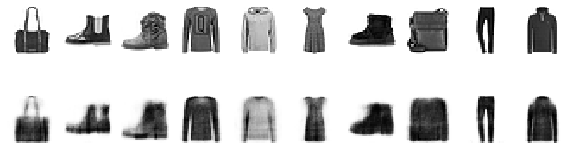

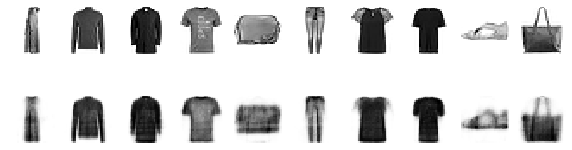

In [37]:
show_reconstructions(autoencoder, X_valid)
show_reconstructions(autoencoder, X_test)

Rows 1 and 2 are original and reconstructed images form the validation data. Rows 3 and 4 are original and reconstructed images form the test (unseen) data, that's why they look a bit more blurry.

## 🎁 5. Bonus Exercises

There are many ways to visualize the results of your model in Python, and for 2D visualization specifically.
A good strategy is to project the high-dimensional data to a lower-dimensionality space, for which we can use our encoder model to create a latent representation of each image, then use t-SNE for mapping the latent data to a 2D plane.

[t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is an algorithm which usually performs very good and creates accurate 2D projections where the original data distribution is preserved as much as possible.

#### Bonus 1: 
Plot the learned compressed representation.

Since we have labels in this dataset, we can use them as color cues.

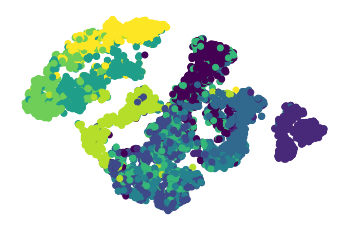

In [38]:
from sklearn.manifold import TSNE

recs = autoencoder.predict(X_valid)
tsne = TSNE() # project to 2 dims by default

# All `fit()` methods in scikit-learn expects 2D arrays, so flatten reconstructed data.
s = recs.shape # (num_samples, width, height)
new_shape = (s[0], np.prod(s[1:])) # (num_samples, width * height)
flat = recs.reshape(new_shape)
comp = tsne.fit_transform(flat)
# Normalize data bounds so that they fit in a [0,1] square plot.
comp = (comp - comp.min()) / (comp.max() - comp.min())

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
plt.axis('off')
plt.show()

####  Bonus 2: 

Plot a representative image of each learned group.

Again, since we have labels in this dataset, we can use them as color cues.

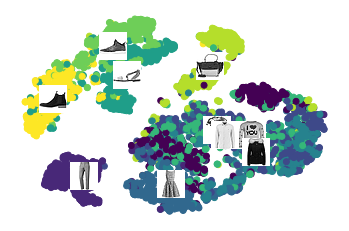

In [31]:
def centroid(arr):
    N, dims = arr.shape
    return np.array([np.sum(arr[:, i])/N for i in range(dims)])

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
for label in list(set(y_valid)):
    # Gather all samples with current label.
    indices = np.where(y_valid == label)
    samples_orig = np.take(X_valid, indices[0], axis=0)
    samples_comp = np.take(comp, indices[0], axis=0)
    # Compute centroid of projected samples.
    center = centroid(samples_comp)
    # Display a representative image (at random) near each centroid.
    # NB: `np.random.choice()` always returns a list, even if we request only one result.
    sample = randselect(samples_orig)[0]
    imgbox = mpl.offsetbox.OffsetImage(sample, cmap='binary')
    imgpic = mpl.offsetbox.AnnotationBbox(imgbox, center, frameon=False)
    plt.gca().add_artist(imgpic)

plt.axis('off')
plt.show()

To sum up, we have found clusters of different items grouped by the category, automagically. 

For instance, we see an 'island' of different types of shoes 👞 in the left top corner and 'archipelago' of different types of dresses 👗 in the right bottom corner. 

## 🏁 6. Conclusion

Now, you know:

1.   autoencoders and advantages of this type of model
2.   how to use Fashion-MNIST dataset for your projects
3.   how to work with different parameters of the model
4.   how to visualize latent spaces

Do not hesitate to ask questions at otorrent@mail.ru

Thank you for your attention and see you next coding session!